<a href="https://colab.research.google.com/github/chutommy/jupyter_scripts/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Astrologická olympiáda
*Krajské kolo 2021/22, kategorie AB (3. a 4. ročník SŠ)*

## D - Praktická úloha

## Python knihovny

* [numpy](https://numpy.org/)
* [matplotlib](https://matplotlib.org/)

### Nahrání dat
**Zdroj**: [PSRB1257+12](https://olympiada.astro.cz/zadani/PSRB1257+12.dat)

In [1]:
import requests

data_url = "https://olympiada.astro.cz/zadani/PSRB1257+12.dat"

# HTTP požadavek
response = requests.get(url=data_url)
response.raise_for_status()

# zpracování dat
raw_records = []
for line in response.text.splitlines(keepends=False):
    line = line.strip()
    record = line.split(sep="   ")

    raw_records.insert(0, record)

### Formátování

In [2]:
import numpy as np
import pandas as pd

p0 = 6218530

# parsování dat
epoch, values = zip(*raw_records)
e = np.array(list(epoch))
x = np.array(list(values), dtype=float) + float(p0)

epd = pd.Series(data=e)
xpd = pd.Series(data=x)

### Analýza

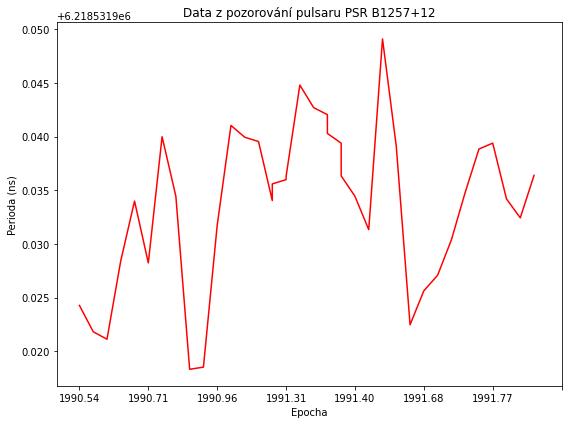

In [3]:
import matplotlib.pyplot as plt

# vizualice period
plt.figure(figsize=(8, 6))
plt.plot(epd, xpd, color="red")
plt.xticks(np.arange(0, len(xpd) - 1, 5))
plt.xlabel("Epocha")
plt.ylabel("Perioda (ns)")
plt.title("Data z pozorování pulsaru PSR B1257+12")
plt.tight_layout()

plt.show()

### Transformace

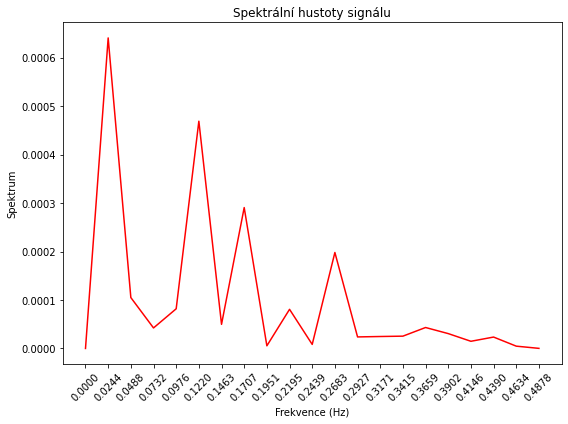

In [4]:
from scipy import fft
from scipy import signal

fs = len(xpd)

# odhd spektrální hustoty pomocí periogramu
freq, Pxx = signal.periodogram(x)
plt.figure(figsize=(8, 6))
plt.plot(freq, Pxx, color="red")

# osa x
ax = plt.gca()
ax.set_xticks(freq)
plt.xticks(rotation=45)

plt.xlabel('Frekvence (Hz)')
plt.ylabel('Spektrum')
plt.title("Spektrální hustoty signálu")
plt.tight_layout()

plt.show()

In [6]:
amplitudes = 1 / fs * np.abs(freq)